# distance viz preprocessing 

### utils

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopy.distance

In [14]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    calculate the distance in miles 
    between lat and lon
    """
    return geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).miles

### preprocessing

In [15]:
loc = pd.read_csv('data/locations_key.csv').drop(columns='address')
dst = pd.read_csv('data/distances.csv')

# TEMPORARY: limit size of csv because i haven't filled in dates too far back
dst = dst[dst.day_int >= 20200914]
dst = dst[dst.day_int <= 20220811]

dst = dst.merge(loc, how='left', left_on='imo', right_on='location').drop(columns='location')
dst = dst.rename(columns={
    'lat':'imo_lat',
    'lon':'imo_lon'
})
dst = dst.merge(loc, how='left', left_on='jwu', right_on='location').drop(columns='location')
dst = dst.rename(columns={
    'lat':'jwu_lat',
    'lon':'jwu_lon'
})

In [16]:
dst['distance'] = dst.apply(lambda row: calculate_distance(row.imo_lat, row.imo_lon, row.jwu_lat, row.jwu_lon), axis=1)

In [17]:
dst[dst.imo_lat != dst.imo_lat]

,date,pretty_date,imo,jwu,description,year,month,day,day_int,imo_lat,imo_lon,jwu_lat,jwu_lon,distance


In [18]:
dst['day_int'] = dst.year*10000 + dst.month*100 + dst.day
dst['log_distance'] = np.log(dst.distance + 1)
dst = dst[dst.day_int > 20200913]

In [19]:
dst.head()

,date,pretty_date,imo,jwu,description,year,month,day,day_int,imo_lat,imo_lon,jwu_lat,jwu_lon,distance,log_distance
0,11-08-2022,"Thu, Aug 11, 22",p's,p's,visit b+p in sf!,2022,8,11,20220811,37.811189,-122.271478,37.811189,-122.271478,0.0,0.0
1,10-08-2022,"Wed, Aug 10, 22",p's,p's,visit b+p in sf!,2022,8,10,20220810,37.811189,-122.271478,37.811189,-122.271478,0.0,0.0
2,09-08-2022,"Tue, Aug 9, 22",p's,p's,visit b+p in sf!,2022,8,9,20220809,37.811189,-122.271478,37.811189,-122.271478,0.0,0.0
3,08-08-2022,"Mon, Aug 8, 22",The Bluffs,The Bluffs,leezard visits clover in sd,2022,8,8,20220808,33.178038,-117.322188,33.178038,-117.322188,0.0,0.0
4,07-08-2022,"Sun, Aug 7, 22",The Bluffs,The Bluffs,leezard visits clover in sd,2022,8,7,20220807,33.178038,-117.322188,33.178038,-117.322188,0.0,0.0


### initial plot idea

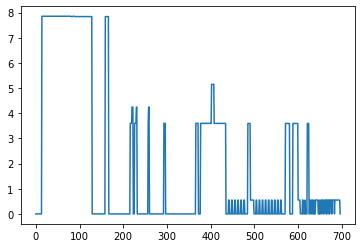

In [20]:
plt.plot(dst.log_distance)

### output data ready for viz :) 

In [21]:
dst.to_csv(r'data/processed.csv')